### Задание ... (3)

In [1]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

In [2]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 2 * y) / (x**2 + y**2 + 1)

In [9]:
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

In [10]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    
    return X, Y

In [11]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    
    return sortedId

In [12]:
# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

In [13]:
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum=4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results

In [14]:
# Реализация алгоритма
results = evoSteps(X, Y)

In [15]:
for i in range(len(results[2])):
    print(f"max_{i+1}_step: {results[2][i][2]}")
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z: {max(qualityArrZ)}')

max_1_step: 0.22222222222222227
max_2_step: 1.0
max_3_step: 2.1333333333333333
max_4_step: 3.133333333333333
max Z: 1.0


### Задание ...

In [1]:
import networkx as nx
from math import e

In [2]:
# ф-я вероятности
def probability(delta, T):
    return 100 * e**(-delta/T)

# ф-я изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

In [3]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [4]:
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    
    return sum(edges)

In [5]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

In [6]:
# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [7]:
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
        
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
            
            # если заданная вероятность попадет в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
        
    return V, arrSum

In [8]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() # создание пустого графа
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер

    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='blue', node_size=2000, with_labels=True)

### ----------------------------------------

In [13]:
distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)] # длины ребер

V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(4, 5),
    (5, 6),
    (2, 4),
    (6, 2)] # последовательность замен вершин
P = [78, 24, 63, 17] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

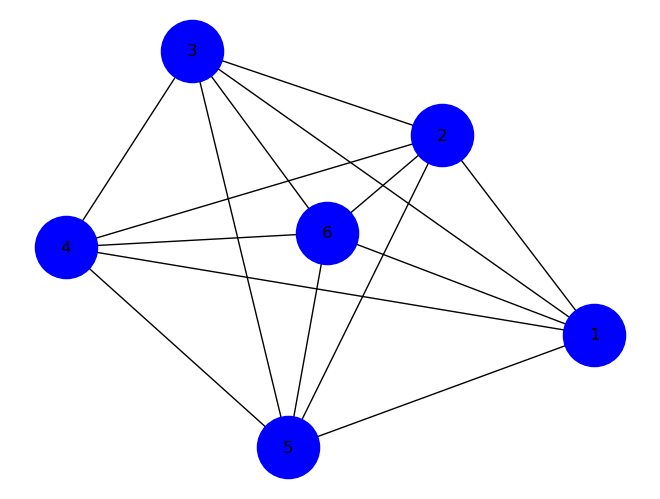

In [14]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='blue', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 155, 142, 128]


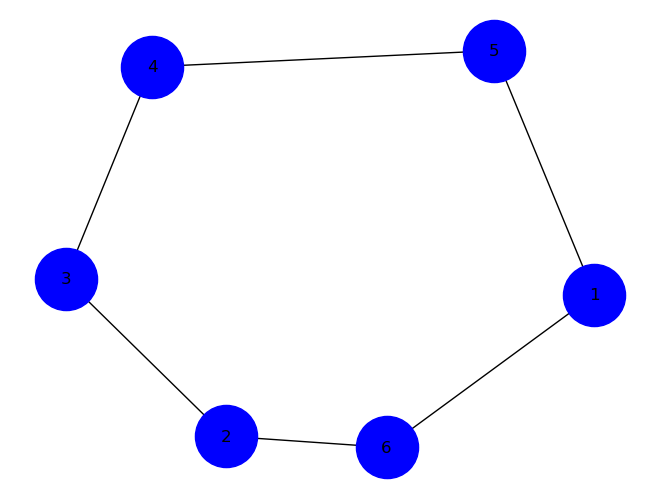

In [15]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута